In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as smf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

2) Salary_hike -> Build a prediction model for Salary_hike

In [ ]:
# Reading the csv file
salary_data=pd.read_csv('/content/Salary_Data.csv')
salary_data.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


EDA and Data Visualization

In [ ]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
#checking for the null values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
#checkinig the duplicate values
salary_data[salary_data.duplicated()].shape

(0, 2)

In [ ]:
salary_data.shape

(30, 2)

In [ ]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


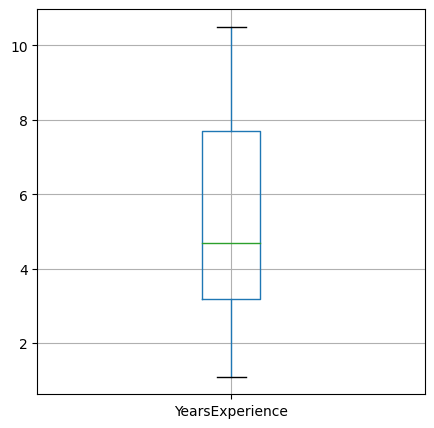

In [ ]:
#Checking for outliers in the data with the help of visualization_boxplot
plt.figure(figsize = (5,5))
salary_data.boxplot(column=['YearsExperience'])
plt.show()

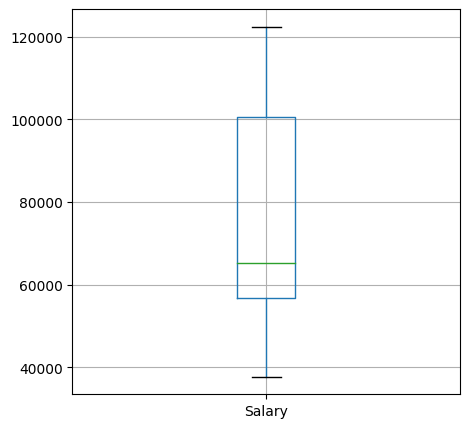

In [ ]:
#Checking for outliers in the data with the help of visualization_boxplot
plt.figure(figsize = (5,5))
salary_data.boxplot(column=['Salary'])
plt.show()

There are no outliers in the given data

In [ ]:
#checking the Correlation
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Density'>

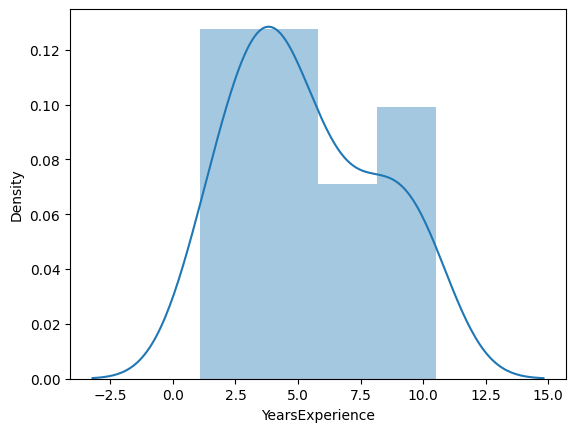

In [ ]:
sns.distplot(salary_data['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

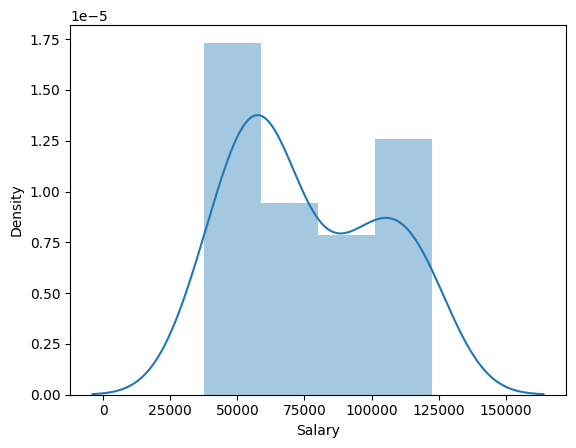

In [ ]:
sns.distplot(salary_data['Salary'])

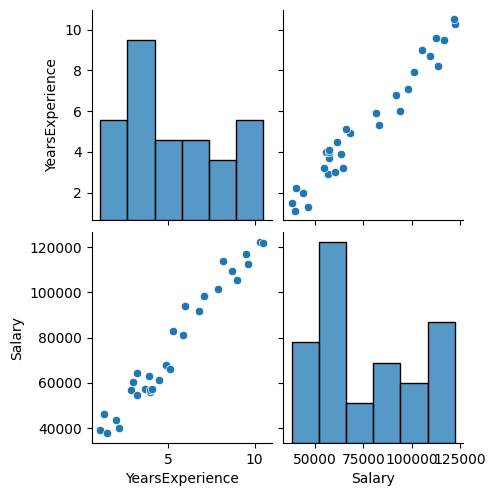

In [ ]:
sns.pairplot(salary_data)
plt.show()

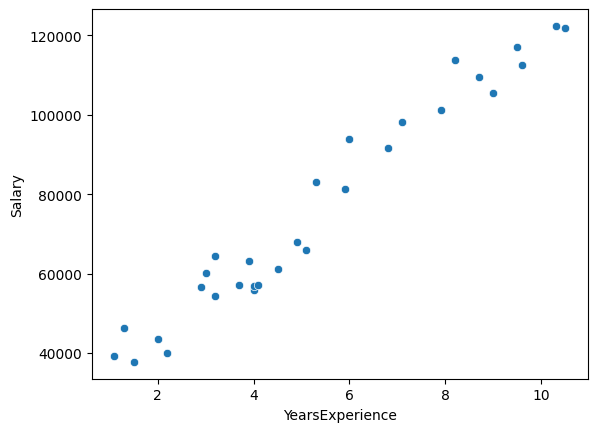

In [ ]:
sns.scatterplot(x=salary_data['YearsExperience'],y=salary_data['Salary'])
plt.show()

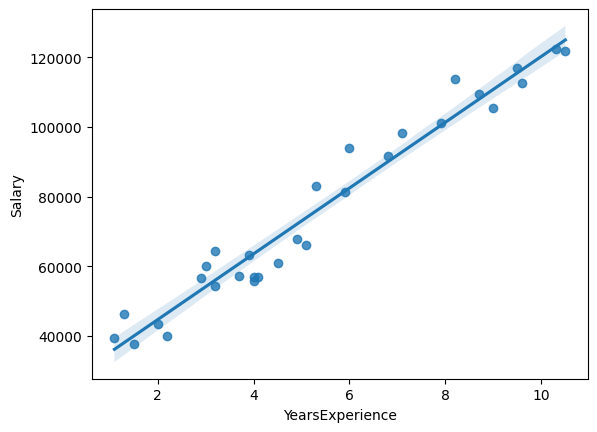

In [ ]:
sns.regplot(x=salary_data['YearsExperience'],y=salary_data['Salary'])
plt.show()

Model Building

Model1 -Creating a model, without applying Transformations

In [ ]:
import statsmodels.formula.api as smf
model1 = smf.ols("Salary~YearsExperience",data = salary_data).fit()

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        08:15:44   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(model1.params,'\n''\n',model1.tvalues,'\n''\n', model1.pvalues)

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64 

 Intercept          11.346940
YearsExperience    24.950094
dtype: float64 

 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [ ]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

Model2- Creating a new model, by applying Logarithmic Transformation

In [ ]:
model2 = smf.ols("Salary~np.log(YearsExperience)",data = salary_data).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           3.25e-13
Time:                        08:17:01   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(model2.params,'\n''\n',model2.tvalues,'\n''\n', model2.pvalues)

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64 

 Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64 

 Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64


In [ ]:
#R squared values
(model2.rsquared,model2.rsquared_adj)

(0.8538888828756969, 0.8486706286926861)

Model3- Construct a new model, by applying a Squareroot transformation

In [ ]:
model3 = smf.ols('Salary~np.sqrt(YearsExperience)', data = salary_data).fit()

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           8.57e-18
Time:                        08:18:15   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(model3.params,'\n''\n',model3.tvalues,'\n''\n', model3.pvalues)

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64 

 Intercept                   -3.262308
np.sqrt(YearsExperience)    19.437148
dtype: float64 

 Intercept                   2.906965e-03
np.sqrt(YearsExperience)    8.565358e-18
dtype: float64


In [ ]:
#R squared values
(model3.rsquared,model3.rsquared_adj)

(0.9310009544993526, 0.9285367028743294)

Model4-Creating an new model, by taking exponential transformation

In [ ]:
model4 = smf.ols("np.log(Salary)~(YearsExperience)",data = salary_data).fit()

In [ ]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           7.03e-18
Time:                        08:19:10   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(model4.params,'\n''\n',model4.tvalues,'\n''\n', model4.pvalues)

Intercept          10.507402
YearsExperience     0.125453
dtype: float64 

 Intercept          273.327166
YearsExperience     19.584833
dtype: float64 

 Intercept          1.604634e-49
YearsExperience    7.027439e-18
dtype: float64


In [ ]:
#R squared values
(model4.rsquared,model4.rsquared_adj)

(0.9319671194084196, 0.929537373673006)

Conclusion:We know higher R-squared value and a low RMSE value is better model so to predict the Salary hike on YearsExperince the model1 is better option.

Predict for new data point

In [ ]:
#for new data
newdata=pd.Series([5,10])
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
data_pred

,YearsExperience
0,5
1,10


In [ ]:
model1.predict(data_pred)

0     73042.011806
1    120291.823413
dtype: float64